In [1]:
import pandas as pd

path = "z2_processed_data_with_orgs.csv"
df = pd.read_csv(path, index_col=0)


In [2]:
# Drops rows with NaN values for sender and receiver org
df.dropna(subset=['sender_org', 'receiver_org'], inplace=True)

In [3]:
df['sender_org'].value_counts()

Communist Party of China               89
Communist Party of the Soviet Union    86
Workers' Party of Korea                 7
Name: sender_org, dtype: int64

In [4]:
df['receiver_org'].value_counts()

Communist Party of the Soviet Union    92
Communist Party of China               76
Workers' Party of Korea                14
Name: receiver_org, dtype: int64

In [5]:
# Converts date column to datetime and sorts by it
def clean_date(date_str):
    date_arr = date_str.split('_')
    middle_token = '-'
    if date_arr[1] != '':
        middle_token = '-' + date_arr[1] + '-'
    new = date_arr[0] + middle_token + date_arr[-1]
    return pd.to_datetime(new)

In [6]:
df["1"] = df["1"].apply(clean_date)
df.sort_values(by=['1'], inplace=True)

In [7]:
# go through the telegrams, keeping track of [count_positive, count_total]
graph = {
    'Communist Party of China':
        {'Communist Party of China': [0,0],
        'Communist Party of the Soviet Union': [0,0],
        'Workers\' Party of Korea': [0,0]},
    'Communist Party of the Soviet Union': 
        {'Communist Party of China': [0,0],
        'Communist Party of the Soviet Union': [0,0],
        'Workers\' Party of Korea': [0,0]},
    'Workers\' Party of Korea':     
        {'Communist Party of China': [0,0],
        'Communist Party of the Soviet Union': [0,0],
        'Workers\' Party of Korea': [0,0]}
}

def get_percentage_positive(sentiment, receiver_org, sender_org, graph):
    if sentiment == 1:
        graph[sender_org][receiver_org][0] += 1
    graph[sender_org][receiver_org][1] += 1

    # print("current positive:", graph[sender_org][receiver_org][0])
    # print("current total:", graph[sender_org][receiver_org][1])
    return graph[sender_org][receiver_org][0]/graph[sender_org][receiver_org][1]

# def print_row(row):
#     print(row['sentiment'])

# df.apply(lambda row: print_row(row), axis=1)
df['sentiment_percentage'] = df.apply(lambda row: get_percentage_positive(row['sentiment'], row['receiver_org'], row['sender_org'], graph), axis=1)


In [29]:
df['year'] = df['1'].apply(lambda x: x.year)
df.groupby(['year']).size()

year
1945     2
1947     4
1948     1
1949     6
1950    74
1951    42
1952    19
1953     5
1954    16
1955     3
1956     4
1958     2
1961     2
1964     1
1975     1
dtype: int64

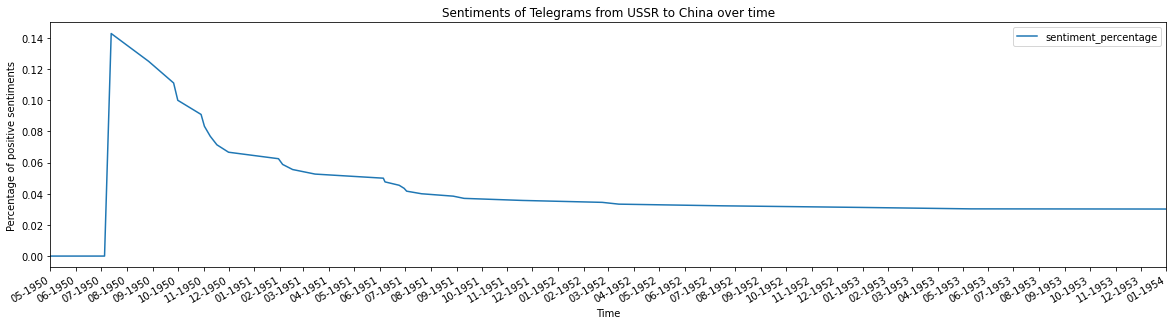

In [35]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
selected = df[(df['sender_org'] == "Communist Party of the Soviet Union") & (df['receiver_org'] == "Communist Party of China")]
ax = selected.plot(x='1', y='sentiment_percentage', 
title='Sentiments of Telegrams from USSR to China over time',
figsize=(20,5),
xlim=(pd.to_datetime('05-01-1950'), pd.to_datetime('01-01-1954')))
plt.xlabel('Time')
plt.ylabel('Percentage of positive sentiments')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%Y"))
plt.show()

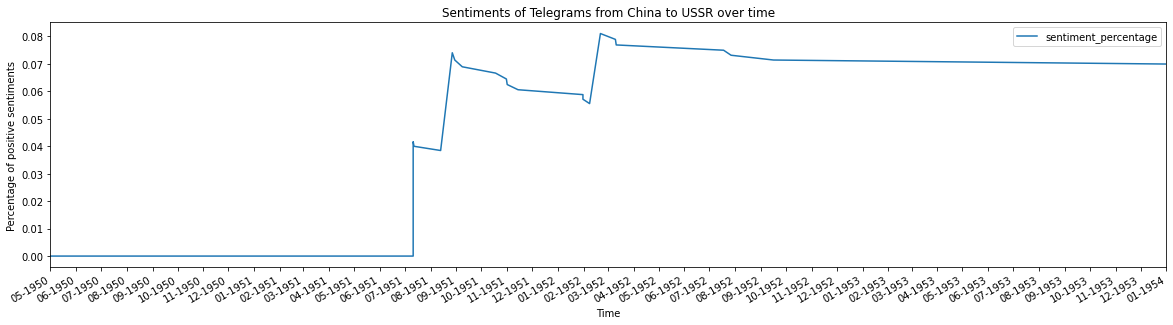

In [39]:
import matplotlib.pyplot as plt
selected = df[(df['sender_org'] == "Communist Party of China") & (df['receiver_org'] == "Communist Party of the Soviet Union")]
ax = selected.plot(x='1', y='sentiment_percentage', 
title='Sentiments of Telegrams from China to USSR over time', 
figsize=(20,5),
xlim=(pd.to_datetime('05-01-1950'), pd.to_datetime('01-01-1954')))
plt.xlabel('Time')
plt.ylabel('Percentage of positive sentiments')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%Y"))
plt.show()

/tmp/ipykernel_631/249599599.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_1['USSR to China'] = selected_1['sentiment_percentage']
/tmp/ipykernel_631/249599599.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_2['China to USSR'] = selected_2['sentiment_percentage']


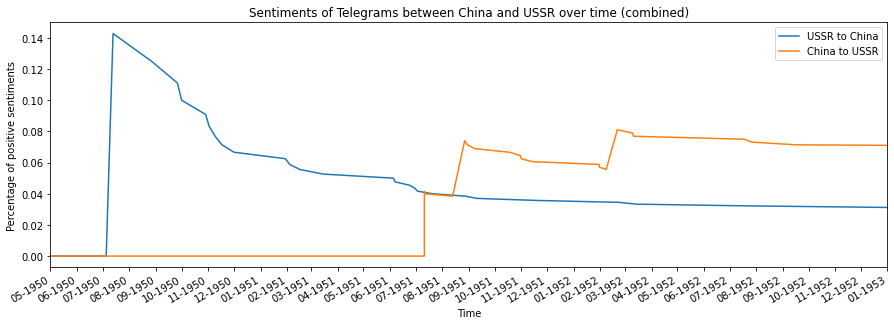

In [44]:
selected_1 = df[(df['sender_org'] == "Communist Party of the Soviet Union") & (df['receiver_org'] == "Communist Party of China")]
selected_2 = df[(df['sender_org'] == "Communist Party of China") & (df['receiver_org'] == "Communist Party of the Soviet Union")]
selected_1['USSR to China'] = selected_1['sentiment_percentage']
selected_2['China to USSR'] = selected_2['sentiment_percentage']
ax = selected_1.plot(x='1', y='USSR to China')
selected_2.plot(x='1', y='China to USSR', ax=ax, 
figsize=(15,5),
xlim=(pd.to_datetime('05-01-1950'), pd.to_datetime('01-01-1953')),
title='Sentiments of Telegrams between China and USSR over time (combined)')
plt.xlabel('Time')
plt.ylabel('Percentage of positive sentiments')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%Y"))
plt.show()